# 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [231]:
import pandas as pd
data=pd.read_csv("employee.csv")
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [232]:
data.shape

(9, 7)

In [233]:
data.columns

Index(['name', 'age', 'income', 'gender', 'department', 'grade',
       'performance_score'],
      dtype='object')

In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


# 2. Reset the index as "name" as the index.

In [258]:
df=pd.read_csv("employee.csv",index_col='name')


In [263]:
 df

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3. Select rows for specific names Jack Morgan and Josh wills.

In [237]:
import pandas as pd
data=pd.read_csv("employee.csv")
data['name']

0      Allen Smith
1          S Kumar
2      Jack Morgan
3        Ying Chin
4    Dheeraj Patel
5    Satyam Sharma
6     James Authur
7       Josh Wills
8         Leo Duck
Name: name, dtype: object

In [238]:
data.loc[data['name']=='Jack Morgan']

,name,age,income,gender,department,grade,performance_score
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674


In [239]:
data.loc[data['name']=='Josh Wills']

,name,age,income,gender,department,grade,performance_score
7,Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance

In [240]:
data.groupby('department').get_group('Sales')

,name,age,income,gender,department,grade,performance_score
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [241]:
data.groupby('department').get_group('Finance')

,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
7,Josh Wills,54.0,52000.0,F,Finance,G3,901


# 5. Display employee who has more than 700 performance score.

In [242]:
data.loc[data['performance_score']>700]

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score.

In [243]:
data.loc[(data['performance_score']>500) & (data['performance_score']<700)] 

,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset.

In [244]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [245]:
data.dtypes

name                  object
age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [246]:
data['age']=data['age'].fillna(data['age'].median())
data.isna().sum()

name                 0
age                  0
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [247]:
data['gender'].mode()

0    F
dtype: object

In [248]:
data['gender']=data['gender'].fillna('F')
data.isna().sum()

name                 0
age                  0
income               2
gender               0
department           0
grade                0
performance_score    0
dtype: int64

In [249]:
data['income']=data['income'].fillna(data['income'].median())
data.isna().sum()

name                 0
age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# 8. Check the outliers and handle outliers in performance score using Percentiles.

<AxesSubplot:xlabel='performance_score'>

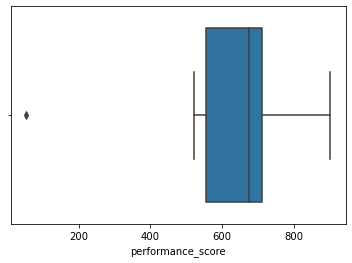

In [250]:
import seaborn as sns
sns.boxplot(x='performance_score',data=data)

In [251]:
#To find outliers
import numpy as np
Q1 = np.percentile(data['performance_score'],25,interpolation='midpoint')
Q2 = np.percentile(data['performance_score'],50,interpolation='midpoint')
Q3 = np.percentile(data['performance_score'],75,interpolation='midpoint')
IQR = Q3 - Q1
low_limit = Q1 - 1.5*IQR
upp_limit = Q3 + 1.5*IQR
print('Q1 is:',Q1)
print('Q2 is:',Q2)
print('Q3 is:',Q3)
print('IQR = Q3 - Q1 =',IQR)
print('Lower limit is :',low_limit)
print('Upper limit is :',upp_limit)




Q1 is: 556.0
Q2 is: 674.0
Q3 is: 711.0
IQR = Q3 - Q1 = 155.0
Lower limit is : 323.5
Upper limit is : 943.5


In [252]:
#To find index of Outliers
ind1 = data['performance_score']>upp_limit
data.loc[ind1].index

Int64Index([], dtype='int64')

In [253]:
#To find index of Outliers
ind2 = data['performance_score']<low_limit
data.loc[ind2].index

Int64Index([6], dtype='int64')

In [254]:
#To drop the index
data.drop([6],inplace=True)

In [255]:
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,52000.0,F,Operations,G3,723
1,S Kumar,45.0,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,45.0,62000.0,F,Sales,G3,649
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


<AxesSubplot:xlabel='performance_score'>

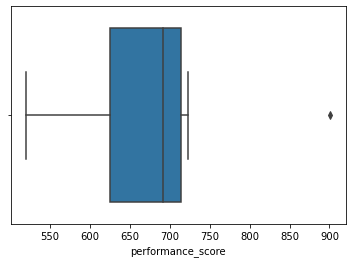

In [256]:
sns.boxplot(x='performance_score',data=data)

# 9. Check the gender column and do Dummy encoding.

In [227]:
data_encoded=pd.get_dummies(data['gender'])
data_encoded

,F,M
0,0,0
1,1,0
2,0,1
3,1,0
4,1,0
5,0,0
7,1,0
8,0,1


# 10.Do the standard scaling on the feature performance score.


In [260]:

data.describe()

,age,income,performance_score
count,8.000000,8.000000,8.00000
mean,39.875000,52750.000000,680.37500
std,10.343217,24099.496142,116.16729
min,23.000000,16000.000000,520.00000
25%,31.500000,40250.000000,625.75000
50%,45.000000,52000.000000,691.50000
75%,45.000000,62750.000000,714.00000
max,54.000000,98000.000000,901.00000


In [261]:
x=data.drop(['age', 'income','name','gender','department','grade'],axis=1)
x.describe()

,performance_score
count,8.00000
mean,680.37500
std,116.16729
min,520.00000
25%,625.75000
50%,691.50000
75%,714.00000
max,901.00000


In [262]:
import pandas as pd
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()
x=standardisation.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0
count,8.000000e+00
mean,4.857226e-17
std,1.069045e+00
min,-1.475872e+00
25%,-5.026938e-01
50%,1.023793e-01
75%,3.094385e-01
max,2.030331e+00
